In [1]:
# Import Numpy and Pandas libraries, loading dataset, and displaying top rows
import numpy as np
import pandas as pd
df = pd.read_csv('Train.csv', index_col=0)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [2]:
# Get information about dimension of dataset
df.shape

(10999, 11)

In [3]:
# Get overview information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10999 entries, 1 to 10999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.0+ MB


In [4]:
# Get statistical summary of numerical columns in the dataset
round(df.describe(), 2)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00
mean,4.05,2.99,210.20,3.57,13.37,3634.02,0.60
std,1.14,1.41,48.06,1.52,16.21,1635.38,0.49
min,2.00,1.00,96.00,2.00,1.00,1001.00,0.00
25%,3.00,2.00,169.00,3.00,4.00,1839.50,0.00
50%,4.00,3.00,214.00,3.00,7.00,4149.00,1.00
75%,5.00,4.00,251.00,4.00,10.00,5050.00,1.00
max,7.00,5.00,310.00,10.00,65.00,7846.00,1.00


In [5]:
# Import visualization libraries
from plotnine import *
import seaborn as sns

In [6]:
# Defining functions for reusability

def ValueCounts(x):   # function to get value counts in non-numeric category
    return df[x].value_counts()


def BarPlot(x):   # function to make a bar plot with Pandas 
    return df[x].value_counts().plot.bar()


def BoxPlot(a, b):   # function to make box plot with Seaborn
    return sns.boxplot(
    x=a,
    y=b,
    data=df
)


def ViolinPlot(a, b):   # function to make violin plot with Seaborn
    return sns.violinplot(
    x=a,
    y=b,
    data=df
)


def ggplotBar(x):   # function to make bar plot with plotnine
    return (ggplot(df)
     + aes(x)
     + geom_bar()
     + aes(color=x)
     + ggtitle('Count of' + ' ' + x)
)


def ggplotMultiBar(x, y):   # function to make bar plot with multiple non-numeric variables using plotnine
    return (ggplot(df)
     + aes(x)
     + aes(y)
     + geom_bar()
     + aes(color=x)
     + ggtitle('Count of' + ' ' + x + ' ' + 'by' + ' ' + y)       

)


def StatsPointofView(x, y):   # function for displaying statistics in numeric and tabular form for better accuracy
    return df.groupby([x], sort=False)[[y]].agg(["count", "mean", "min", "max",])

In [7]:
# Get value counts for Warehouse_block  
ValueCounts('Warehouse_block')

F    3666
D    1834
A    1833
C    1833
B    1833
Name: Warehouse_block, dtype: int64

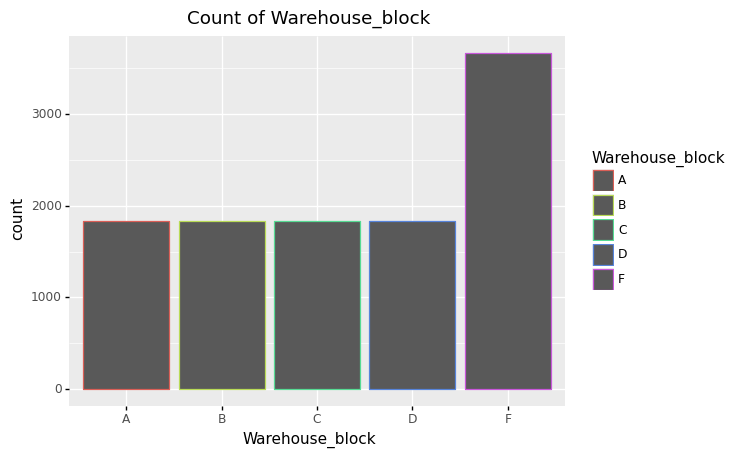

<ggplot: (114381891250)>

In [8]:
# Plot bar plot for Warehouse_block 
ggplotBar('Warehouse_block')

### Deductions:
Most goods were shipped from Warehouse block F than the other Warehouse blocks.

In [9]:
# Get value counts for Mode_of_Shipment 
ValueCounts('Mode_of_Shipment')

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

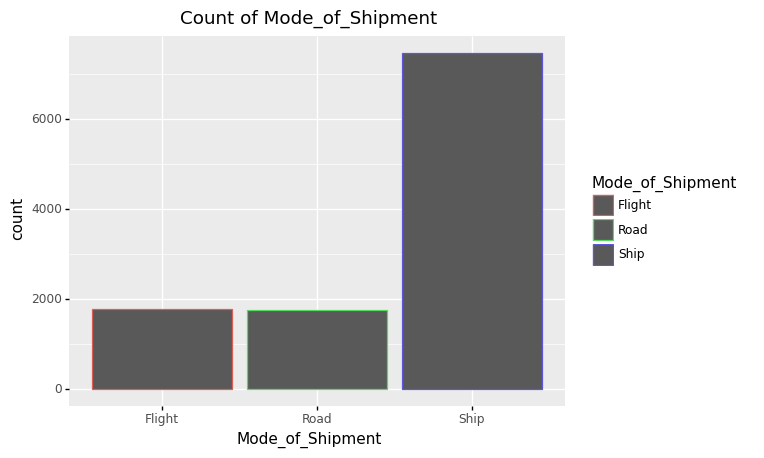

<ggplot: (114383025189)>

In [10]:
# Make bar plot for Mode_of_Shipment
ggplotBar('Mode_of_Shipment')

### Deductions:
The most used mode of shipment of goods is by Ship.

In [11]:
ValueCounts('Reached.on.Time_Y.N')

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

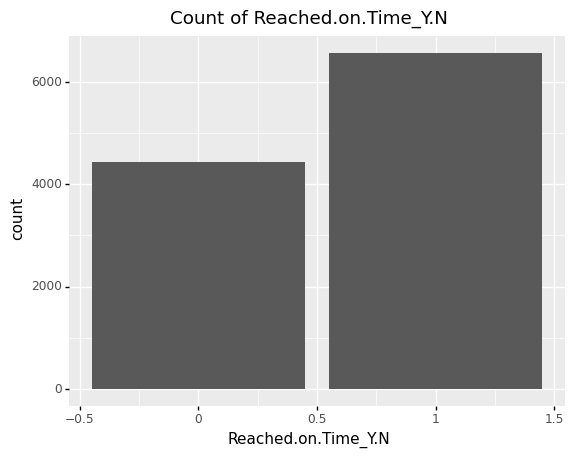

<ggplot: (114383060059)>

In [12]:
ggplotBar('Reached.on.Time_Y.N')

### Deductions:

6563 products reached their destination on time, while 4436 products did not.



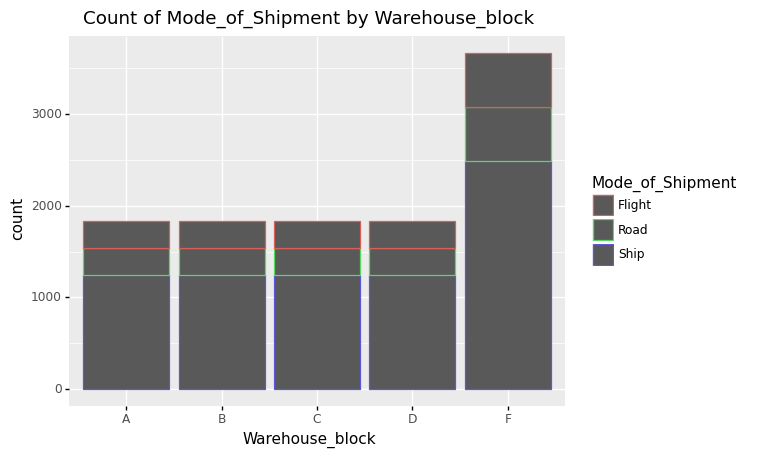

<ggplot: (114383209921)>

In [13]:
# Make bar plot for Mode_of_Shipment and Warehouse_block
ggplotMultiBar('Mode_of_Shipment', 'Warehouse_block')

### Deductions:
The most used mode of shipment of goods from all Warehouse blocks is by Ship.

In [14]:
# Get summary statistics for Customer_care_calls group by Warehouse_block
StatsPointofView('Warehouse_block', 'Customer_care_calls')

Customer_care_calls                  
                              count      mean min max
Warehouse_block                                      
D                              1834  4.053435   2   7
F                              3666  4.075014   2   7
A                              1833  4.038189   2   7
B                              1833  4.020185   2   7
C                              1833  4.064921   2   7

<AxesSubplot:xlabel='Warehouse_block', ylabel='Customer_care_calls'>

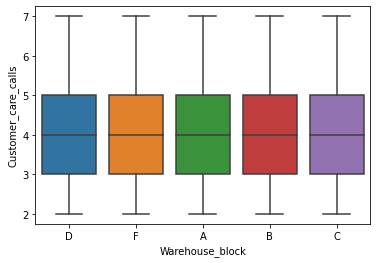

In [15]:
# Make box plot for Warehouse_block and Customer_care_calls
BoxPlot('Warehouse_block', 'Customer_care_calls')

### Deductions:
There is no pronounced difference in the number of customer care calls for products in each Warehouse block

In [16]:
# Get summary statistics for Cost_of_the_Product group by Warehouse_block
StatsPointofView('Warehouse_block', 'Cost_of_the_Product')

Cost_of_the_Product                      
                              count        mean  min  max
Warehouse_block                                          
D                              1834  210.907852   96  310
F                              3666  209.077196   96  310
A                              1833  208.767594   96  310
B                              1833  212.159302   96  310
C                              1833  211.191489  101  310

<AxesSubplot:xlabel='Warehouse_block', ylabel='Cost_of_the_Product'>

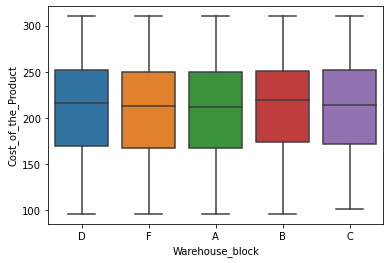

In [17]:
# Make box plot for Warehouse_block and Cost_of_the_Product
BoxPlot('Warehouse_block', 'Cost_of_the_Product')

### Deductions:
The cost of products in Warehouse block B is highest, closely followed by that of Warehouse block C. 

In [18]:
# Get value counts for Gender
ValueCounts('Gender')

F    5545
M    5454
Name: Gender, dtype: int64

<AxesSubplot:>

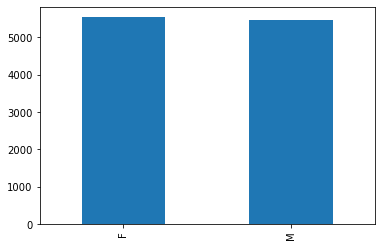

In [19]:
# Make bar plot for Gender
BarPlot('Gender')

### Deductions:
The Female Gender got more products shipped to them than Male individuals.

In [20]:
# Get summary statistics for Cost_of_the_Product group by Gender
StatsPointofView('Gender', 'Cost_of_the_Product')

Cost_of_the_Product                     
                     count        mean min  max
Gender                                         
F                     5545  209.255005  96  310
M                     5454  211.154382  96  310

<AxesSubplot:xlabel='Gender', ylabel='Cost_of_the_Product'>

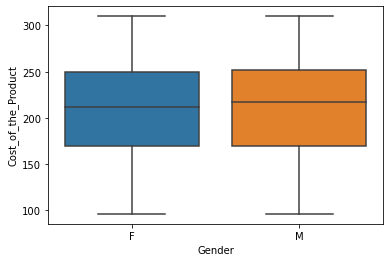

In [21]:
# Make box plot for Gender and Cost_of_the_Product
BoxPlot('Gender', 'Cost_of_the_Product')

### Deductions:
Individuals of the Male Gender spent more on average in products' purchase, than the Female Gender.

In [22]:
# Get summary statistics for Discount_offered by Gender
StatsPointofView('Gender', 'Discount_offered')

Discount_offered                   
                  count       mean min max
Gender                                    
F                  5545  13.562489   1  65
M                  5454  13.180785   1  65

<AxesSubplot:xlabel='Gender', ylabel='Discount_offered'>

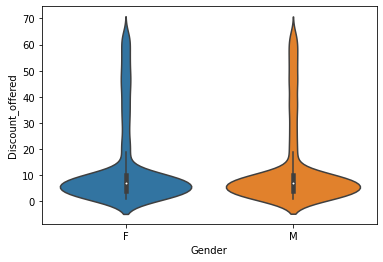

In [23]:
# Make box plot for Gender and Discount_offered
ViolinPlot('Gender', 'Discount_offered')

### Deductions:
Individuals of the Female Gender slightly got more discounts for their products than the Male Gender, though the difference is minute. 

In [24]:
# Get value counts for Product_importance
ValueCounts('Product_importance')

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

<AxesSubplot:>

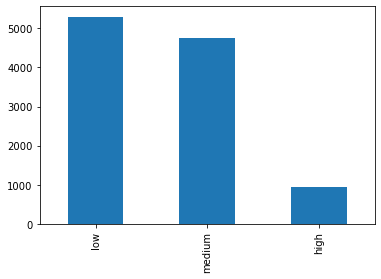

In [25]:
# Make bar plot for Product_importance
BarPlot('Product_importance')

### Deductions: 
Products of low importance were shipped mostly, followed by those of medium importance.

In [26]:
# Get summary statistics for Cost_of_the_Product group by Product_importance
StatsPointofView('Product_importance', 'Cost_of_the_Product')

Cost_of_the_Product                     
                                 count        mean min  max
Product_importance                                         
low                               5297  212.059845  96  310
medium                            4754  209.382415  96  310
high                               948  203.871308  96  307

<AxesSubplot:xlabel='Product_importance', ylabel='Cost_of_the_Product'>

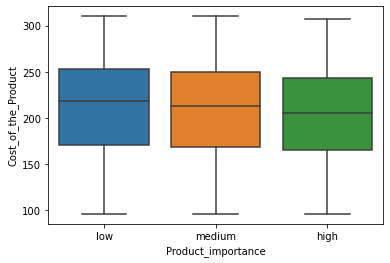

In [27]:
# Make box plot for Product_importance and Cost_of_the_Product
BoxPlot('Product_importance', 'Cost_of_the_Product')

### Deductions:
Products of low importance cost more than others on the average scale, followed by those of medium importance.

In [28]:
# Get summary statistics for Discount_offered group by Product_importance
StatsPointofView('Product_importance', 'Discount_offered')

Discount_offered                   
                              count       mean min max
Product_importance                                    
low                            5297  13.043043   1  65
medium                         4754  13.483172   1  65
high                            948  14.666667   1  65

<AxesSubplot:xlabel='Product_importance', ylabel='Discount_offered'>

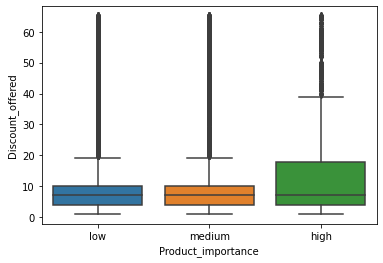

In [29]:
# Make box plot for Product_importance and Discount_offered
BoxPlot('Product_importance', 'Discount_offered')

### Deductions: 
Products of high importance were sold with more discounts than other products.

In [30]:
# Get summary statistics for Prior_purchases group by Product_importance
StatsPointofView('Product_importance', 'Prior_purchases')

Prior_purchases                  
                             count      mean min max
Product_importance                                  
low                           5297  3.528224   2  10
medium                        4754  3.593605   2  10
high                           948  3.657173   2  10

<AxesSubplot:xlabel='Product_importance', ylabel='Prior_purchases'>

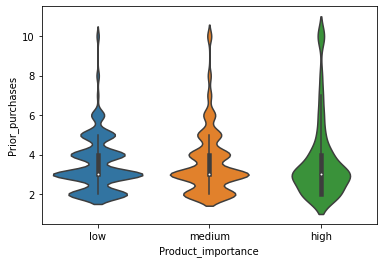

In [31]:
# Make violin plot for Product_importance and Prior_purchases
ViolinPlot('Product_importance', 'Prior_purchases')

### Deductions:
Products of high importance were slighlty bought more in previous purchases than other products.

In [32]:
# Get summary statistics for Weight_in_gms group by Warehouse_block
StatsPointofView('Warehouse_block', 'Weight_in_gms')

Weight_in_gms                         
                        count         mean   min   max
Warehouse_block                                       
D                        1834  3628.846783  1005  7640
F                        3666  3641.387616  1001  7846
A                        1833  3615.448991  1004  6000
B                        1833  3635.701037  1001  7401
C                        1833  3641.331151  1005  6064

<AxesSubplot:xlabel='Warehouse_block', ylabel='Weight_in_gms'>

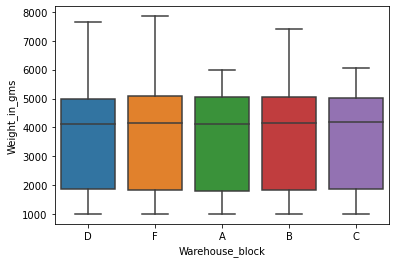

In [33]:
# Make box plot for Warehouse_block and Weight_in_gms
BoxPlot('Warehouse_block', 'Weight_in_gms')

### Deductions: 
Products from Warehouse block C have the highest weight on the average, while Warehouse block F has the highest weighing product on the maximum scale.

In [34]:
# Get summary statistics for Weight_in_gms group by Mode_of_Shipment
StatsPointofView('Mode_of_Shipment', 'Weight_in_gms')

Weight_in_gms                         
                         count         mean   min   max
Mode_of_Shipment                                       
Flight                    1777  3629.378165  1001  5997
Ship                      7462  3631.457518  1001  7846
Road                      1760  3649.550568  1002  6614

<AxesSubplot:xlabel='Mode_of_Shipment', ylabel='Weight_in_gms'>

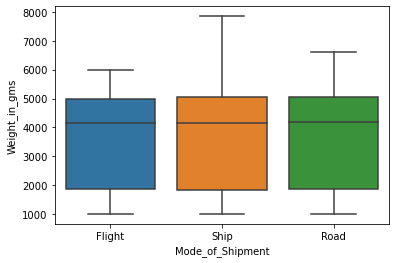

In [35]:
# Make box plot for Mode_of_Shipment and Weight_in_gms
BoxPlot('Mode_of_Shipment', 'Weight_in_gms')

### Deductions:
Products shipped by road have the highest weight on the average scale, while the heaviest product was transported by ship.

In [36]:
# Get summary statistics for Weight_in_gms group by Gender
StatsPointofView('Gender', 'Weight_in_gms')

Weight_in_gms                         
               count         mean   min   max
Gender                                       
F               5545  3628.222362  1001  7684
M               5454  3639.907774  1001  7846

<AxesSubplot:xlabel='Gender', ylabel='Weight_in_gms'>

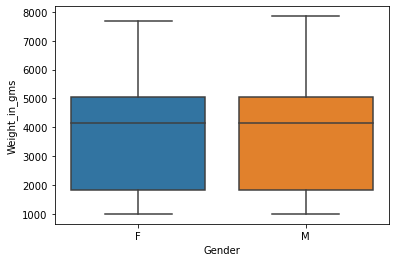

In [37]:
# Make box plot for Gender and Weight_in_gms
BoxPlot('Gender', 'Weight_in_gms')

### Deductions:
Individuals of the Male Gender bought the heaviest products both on the average and maximum scale.

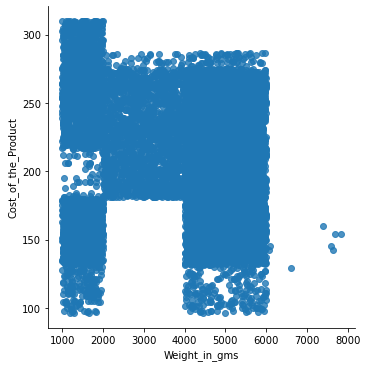

In [38]:
# Make scatter plot for Weight_in_gms and Cost_of_the_Product
sns.lmplot(x='Weight_in_gms', y='Cost_of_the_Product',
           fit_reg=False, data=df)

### Deductions:
Products of lesser weight cost more than those that weigh higher.

<AxesSubplot:>

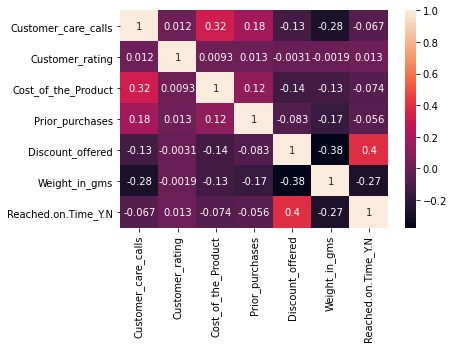

In [39]:
# Make a heat map to visualize correlation between variables
sns.heatmap(
   df.corr(),
    annot=True
)

### Deductions:


1. Customer_care_calls positively correlates mostly with Cost_of_the_Product and negatively correlates mostly with Reached.on.Time_Y.N. This may mean that the more expensive a product is, the more calls would probably be received from the customers to monitor their shipment, and more calls were received probably because products didn't reach their destination on time.   

2. Customer_rating negatively correlates mostly with Discount_offered and Weight_in_gms, which may mean higher customer ratings goes with lesser discount offered and lesser weight.

3. Cost_of_the_Product negatively correlates mostly with  Discount_offered and Weight_in_gms, which may mean that products of higher costs get lower discounts and weigh lesser.

4.  Discount_offered positively correlates mostly with Reached.on.Time_Y.N, negatively correlates with Prior_purchases and Weight_in_gms. This may mean that: products with higher discount reached their destination on time; products with higher discounts were either not purchased before, or were not purchased in large quantities, so higher discounts were introduced probably to incentivize more purchases; and products that weigh more get lesser discounts.   

5. Reached.on.Time_Y.N negatively correlates with Prior_purchases and Weight_in_gms. This may mean: products that reach their destination on time were either not purchased before, or were not purchased in large quantities, so they were delivered on time probably as a show of good customer service, to incentivize more purchases; products that weigh more did not reach their destination on time.





